In [1]:
import pandas as pd
import numpy as np
import chardet

try:
    # 1. Deteksi encoding file
    with open('ashrae_db.csv', 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
    
    encoding_detected = result['encoding']
    confidence = result['confidence']
    print(f"Encoding terdeteksi: {encoding_detected} (confidence: {confidence:.2f})")
    
    # Fallback ke utf-8 jika confidence rendah
    if confidence < 0.7:
        encoding_detected = 'utf-8'
        print(f"Menggunakan fallback encoding: {encoding_detected} karena confidence rendah")
    
    # 2. Baca file CSV
    ashrae_data = pd.read_csv('ashrae_db.csv', 
                      encoding=encoding_detected, 
                      low_memory=False,
                      on_bad_lines='warn') 
    
    print("File berhasil dibaca dengan shape:", ashrae_data.shape)

except FileNotFoundError:
    print("Error: File tidak ditemukan!")
except Exception as e:
    print(f"Error terjadi saat membaca file: {str(e)}")

# --- Pilih kolom yang dipakai di penelitian ---
kolom_input = ['Air temperature (°C)', 'Relative humidity (%)', 'Air velocity (m/s)', 'Radiant temperature (°C)', 'PMV']

# --- Analisis deskriptif Dataset ASHRAE (Tabel 3.1) ---
ashrae_desc = ashrae_data[kolom_input].describe().T
ashrae_desc = ashrae_desc[['min', 'max', 'mean', '50%', 'std']]
ashrae_desc.columns = ['Min', 'Max', 'Mean', 'Median', 'Std Dev']
print("\nTabel 3.1 - Statistik Deskriptif ASHRAE\n")
print(ashrae_desc)



Encoding terdeteksi: MacRoman (confidence: 0.73)
File berhasil dibaca dengan shape: (107583, 70)

Tabel 3.1 - Statistik Deskriptif ASHRAE

                          Min     Max       Mean  Median    Std Dev
Air temperature (°C)      0.6   63.20  24.496358   23.90   3.782002
Relative humidity (%)     0.0  100.00  47.548068   47.20  15.760944
Air velocity (m/s)        0.0   56.17   0.175384    0.09   0.405937
Radiant temperature (°C)  1.2  148.10  24.602735   24.00   4.257815
PMV                      -3.0    3.00   0.136790    0.10   0.944571


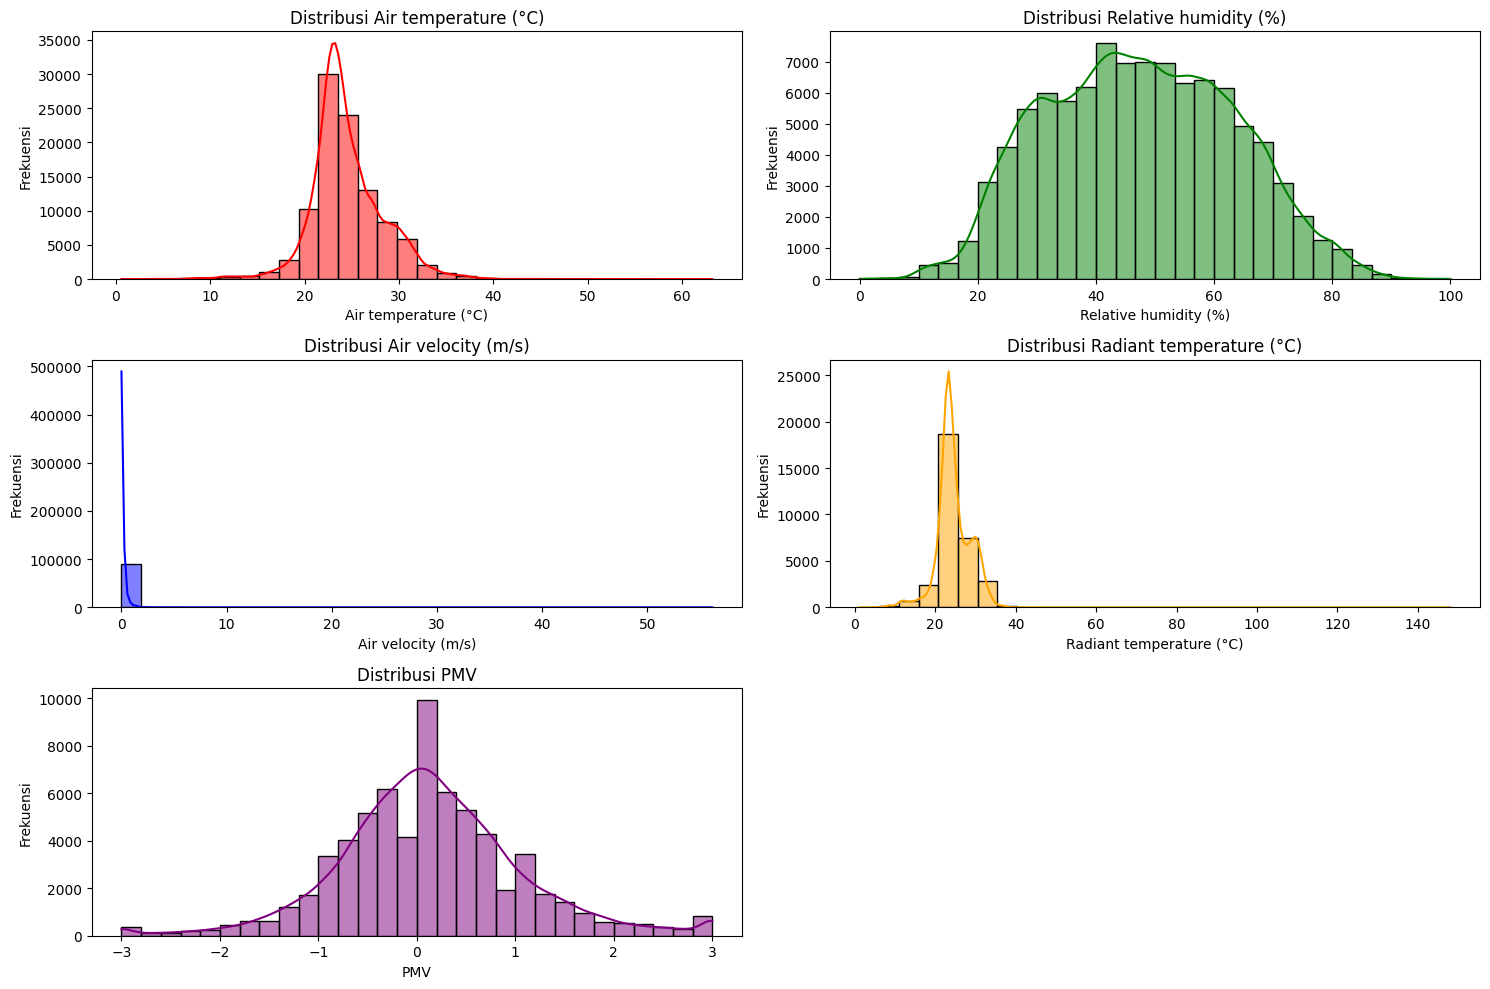

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Siapkan ukuran canvas plot ---
plt.figure(figsize=(15, 10))

# --- Daftar kolom dan warnanya ---
kolom_input_new = ['Air temperature (°C)', 'Relative humidity (%)', 'Air velocity (m/s)', 
                   'Radiant temperature (°C)', 'PMV']
warna = ['red', 'green', 'blue', 'orange', 'purple']

# --- Loop untuk membuat histogram ---
for i, (param, w) in enumerate(zip(kolom_input_new, warna), 1):
    plt.subplot(3, 2, i)
    sns.histplot(ashrae_data[param], kde=True, bins=30, color=w)
    plt.title(f'Distribusi {param}')
    plt.xlabel(param)
    plt.ylabel('Frekuensi')

# --- Atur layout agar rapi ---
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# --- Baca data utama ---
IOT_data = pd.read_csv('ALL_DAY_XGB_PREDICTED.csv') 
print("File berhasil dibaca dengan shape:", IOT_data.shape)

# --- Pilih kolom yang dipakai di penelitian ---
kolom_input = ['temperature', 'humidity', 'air_flow', 'mrt', 'pmv']

# --- Iris Day 1: baris 2–734 (index 1–733) ---
IOT_day1 = IOT_data.iloc[1:734].reset_index(drop=True)

# --- Statistik deskriptif Day 1 ---
IOT_desc_day1 = IOT_day1[kolom_input].describe().T
IOT_desc_day1 = IOT_desc_day1[['min', 'max', 'mean', '50%', 'std']]
IOT_desc_day1.columns = ['Min', 'Max', 'Mean', 'Median', 'Std Dev']

print("\nTabel 3.2 - Statistik Deskriptif IoT Day 1\n")
print(IOT_desc_day1)



File berhasil dibaca dengan shape: (1451, 8)

Tabel 3.2 - Statistik Deskriptif IoT Day 1

                 Min      Max       Mean   Median   Std Dev
temperature  25.2000  29.9000  26.370805  26.5000  0.665643
humidity     46.6000  87.3000  54.813370  54.0000  5.994144
air_flow      0.0200   1.2500   1.020641   1.0200  0.142504
mrt          23.3200  29.1800  24.771023  25.0500  0.763719
pmv          -1.0899   1.7478  -0.699010  -0.6645  0.203289


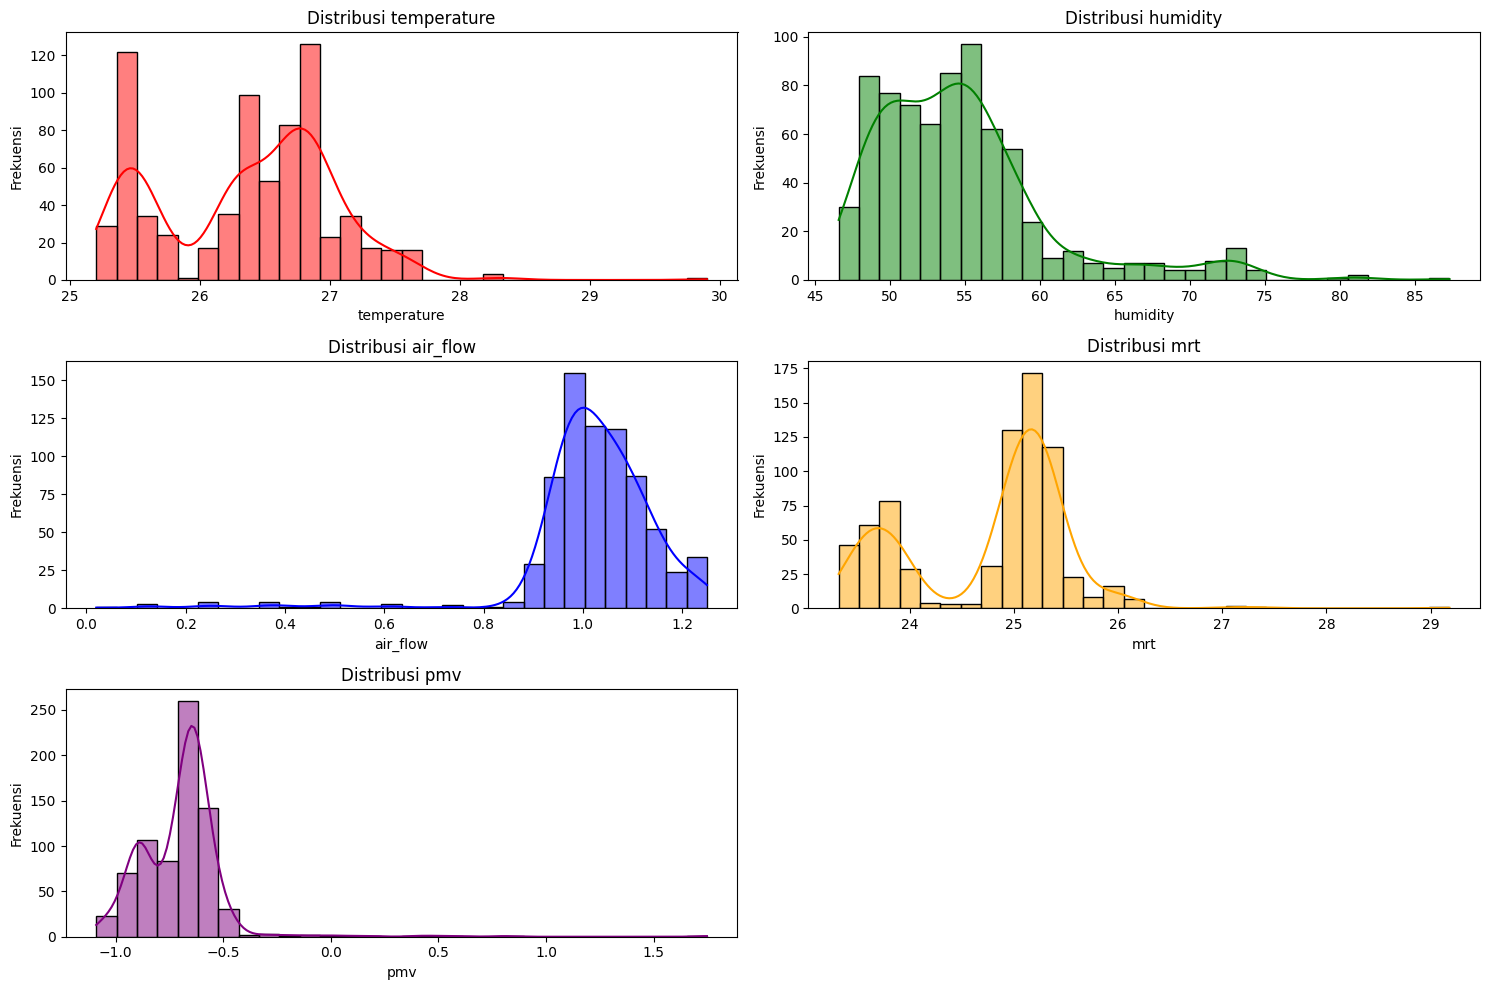

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Siapkan ukuran canvas plot ---
plt.figure(figsize=(15, 10))

# --- Daftar kolom dan warnanya ---
kolom_input_new = ['temperature', 'humidity', 'air_flow', 'mrt', 'pmv']
warna = ['red', 'green', 'blue', 'orange', 'purple']

# --- Loop untuk membuat histogram ---
for i, (param, w) in enumerate(zip(kolom_input_new, warna), 1):
    plt.subplot(3, 2, i)
    sns.histplot(IOT_day1[param], kde=True, bins=30, color=w)
    plt.title(f'Distribusi {param}')
    plt.xlabel(param)
    plt.ylabel('Frekuensi')

# --- Atur layout agar rapi ---
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# --- Baca data utama ---
IOT_data = pd.read_csv('ALL_DAY.csv') 
print("File berhasil dibaca dengan shape:", IOT_data.shape)

# --- Pilih kolom yang dipakai di penelitian ---
kolom_input = ['temperature', 'humidity', 'air_flow', 'mrt', 'pmv']

# --- Iris Day 1: baris 2–734 (index 1–733) ---
IOT_day2 = IOT_data.iloc[734:1452].reset_index(drop=True)

# --- Statistik deskriptif Day 1 ---
IOT_desc_day2 = IOT_day2[kolom_input].describe().T
IOT_desc_day2 = IOT_desc_day2[['min', 'max', 'mean', '50%', 'std']]
IOT_desc_day2.columns = ['Min', 'Max', 'Mean', 'Median', 'Std Dev']

print("\nTabel 3.3 - Statistik Deskriptif IoT Day 2\n")
print(IOT_desc_day2)



File berhasil dibaca dengan shape: (1451, 8)

Tabel 3.3 - Statistik Deskriptif IoT Day 2

               Min    Max       Mean  Median   Std Dev
temperature  29.70  32.20  31.224407   31.40  0.695097
humidity     72.40  89.40  78.162204   76.30  4.707056
air_flow      0.02   0.94   0.539582    0.54  0.206551
mrt          28.38  31.30  30.233543   30.56  0.709216
pmv           0.54   2.38   1.323515    1.30  0.292673


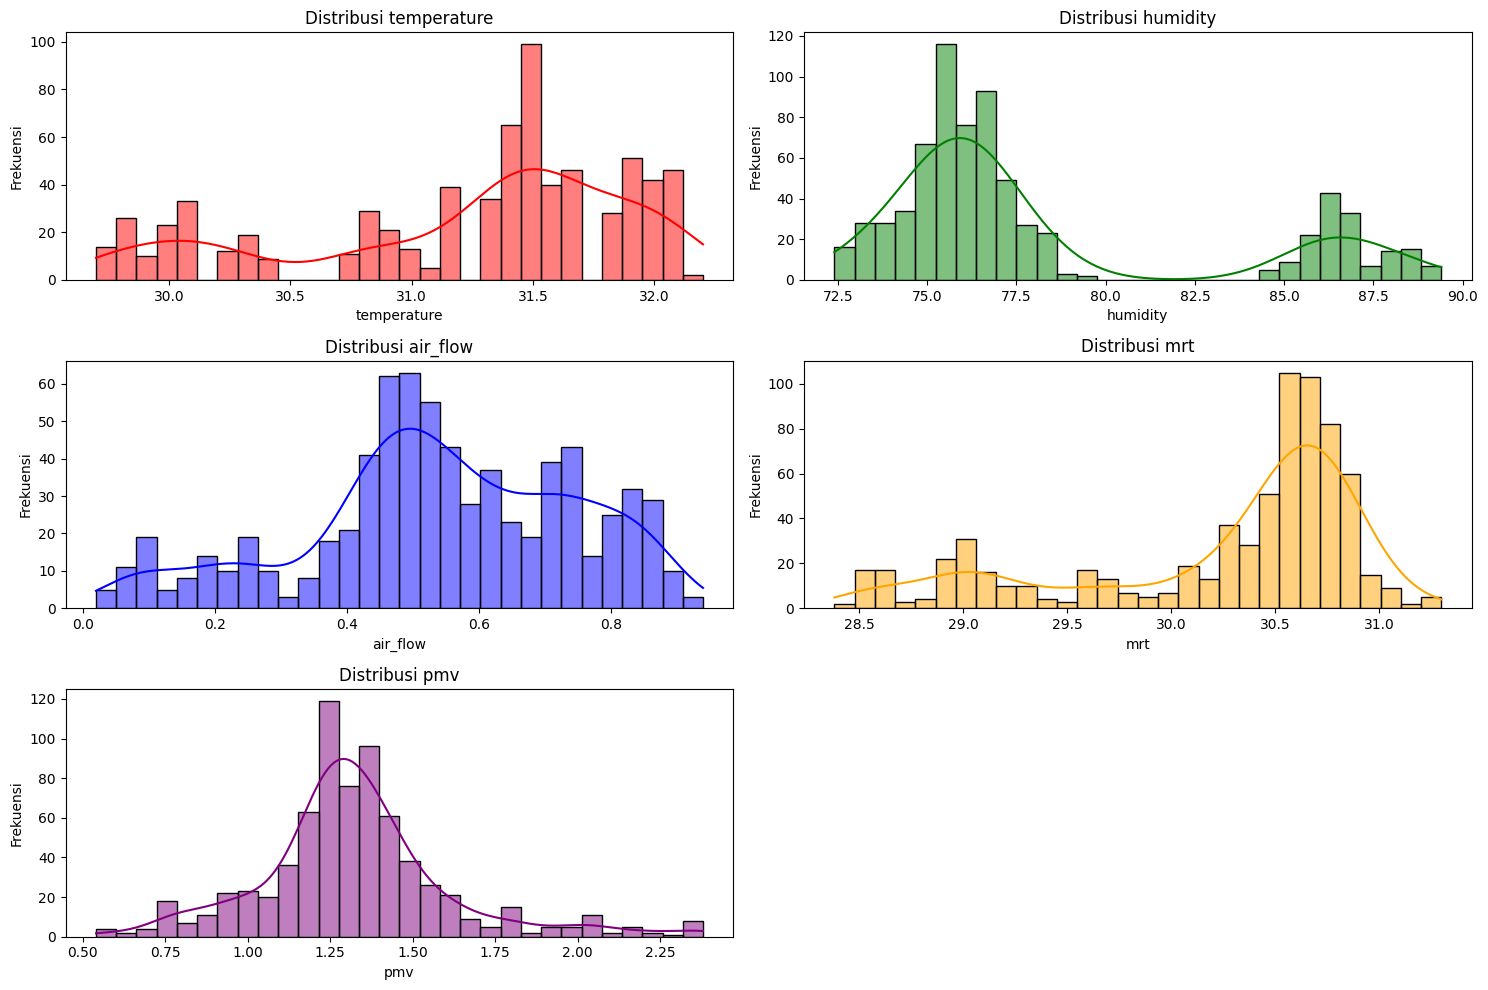

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Siapkan ukuran canvas plot ---
plt.figure(figsize=(15, 10))

# --- Daftar kolom dan warnanya ---
kolom_input_new = ['temperature', 'humidity', 'air_flow', 'mrt', 'pmv']
warna = ['red', 'green', 'blue', 'orange', 'purple']

# --- Loop untuk membuat histogram ---
for i, (param, w) in enumerate(zip(kolom_input_new, warna), 1):
    plt.subplot(3, 2, i)
    sns.histplot(IOT_day2[param], kde=True, bins=30, color=w)
    plt.title(f'Distribusi {param}')
    plt.xlabel(param)
    plt.ylabel('Frekuensi')

# --- Atur layout agar rapi ---
plt.tight_layout()
plt.show()


In [6]:
# --- Simpan semua ke Excel dalam satu file ---
with pd.ExcelWriter("statistik_deskriptif_data_understanding.xlsx") as writer:
    IOT_desc_day1.to_excel(writer, sheet_name="IoT Day 1")
    IOT_desc_day2.to_excel(writer, sheet_name="IoT Day 2")